In [239]:
import rdkit
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, MACCSkeys
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import umap
import hdbscan

# <font color="red"> TRAINING DATA ANALYSIS </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
labels_iteration_1_training = pd.read_csv('results/abeta_deprecated/iteration_1/training_labels.txt')
labels_testing = pd.read_csv('results/abeta_deprecated/iteration_2/testing_labels.txt')
labels_training = pd.read_csv('results/abeta_deprecated/iteration_2/training_labels.txt')
labels_validation = pd.read_csv('results/abeta_deprecated/iteration_2/validation_labels.txt')
labels_iteration_2_training = pd.concat([labels_iteration_1_training, labels_testing, labels_training, labels_validation])

Text(-4.662703596650413, 117546.66, 'Mean: -4.76')

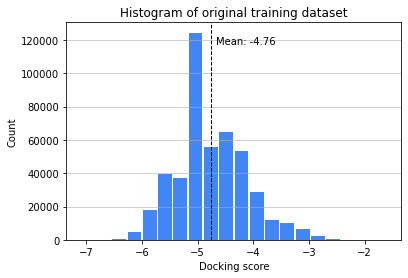

In [5]:
# Get all scores and convert to numpy array
labels_iteration_1_training_scores = list(labels_iteration_1_training['r_i_docking_score'])
numpy_labels_iteration_1_training_scores = np.array(labels_iteration_1_training_scores)

# Plot histogram of the scores
plt.hist(numpy_labels_iteration_1_training_scores,bins=20, rwidth=0.9,
                   color='#4285f4')
plt.title('Histogram of original training dataset')
plt.xlabel('Docking score')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.axvline(numpy_labels_iteration_1_training_scores.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(numpy_labels_iteration_1_training_scores.mean()*0.98, max_ylim*0.9, 'Mean: {:.2f}'.format(numpy_labels_iteration_1_training_scores.mean()))
# plt.savefig('method1_histogram_original_training_dataset.pdf',bbox_inches = "tight")


Text(-6.646013595763527, 190210.54499999998, 'Mean: -5.19')

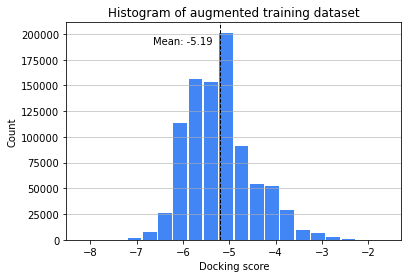

In [6]:
# Get all scores and convert to numpy array
labels_iteration_2_training_scores = list(labels_iteration_2_training['r_i_docking_score'])
numpy_labels_iteration_2_training_scores = np.array(labels_iteration_2_training_scores)
plt.hist(numpy_labels_iteration_2_training_scores,bins=20, rwidth=0.9,
                   color='#4285f4')

# Plot histogram of the scores
plt.title('Histogram of augmented training dataset')
plt.xlabel('Docking score')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.axvline(numpy_labels_iteration_2_training_scores.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(numpy_labels_iteration_2_training_scores.mean()*1.28, max_ylim*0.9, 'Mean: {:.2f}'.format(numpy_labels_iteration_2_training_scores.mean()))
# plt.savefig('method1_histogram_augmented_training_dataset.pdf',bbox_inches = "tight")

# <font color="red"> EXTRACTION ANALYSIS </font>

# DATA PREPARATION

## Process docking output and extract labels

Process docking output by extracting labels

In [2]:
# !mkdir -p extraction_outputs

In [3]:
# !python scripts_2/extract_labels_vina.py -directory_to_process output_conformations_smiles_iteration_1 -path_to_store extraction_outputs 

In [4]:
# !python scripts_2/extract_labels_vina.py -directory_to_process output_conformations_smiles_iteration_2 -path_to_store extraction_outputs 

In [5]:
# !ls extraction_outputs

## Load labels and smiles

In [52]:
labels_iteration_1 = pd.read_csv("extraction_outputs/output_conformations_smiles_iteration_1_labels.txt")
labels_iteration_2 = pd.read_csv("extraction_outputs/output_conformations_smiles_iteration_2_labels.txt")

In [53]:
smiles_iteration_1 = pd.read_csv("extraction_outputs/smiles_iteration_1.csv", 
                                 delim_whitespace=True)
smiles_iteration_2 = pd.read_csv("extraction_outputs/smiles_iteration_2.csv", 
                                 delim_whitespace=True)
smiles_iteration_1 = smiles_iteration_1.rename(columns={"id": "ZINC_ID"})
smiles_iteration_2 = smiles_iteration_2.rename(columns={"id": "ZINC_ID"})

In [54]:
iteration_1 = pd.merge(labels_iteration_1,smiles_iteration_1, on="ZINC_ID", how='left')
iteration_2 = pd.merge(labels_iteration_2,smiles_iteration_2, on="ZINC_ID", how='left')

In [55]:
all_predicted_hits = pd.concat([iteration_1,iteration_2])

## Load original dataset labels

In [56]:
labels_iteration_1_training = pd.read_csv('results/abeta_deprecated/iteration_1/training_labels.txt')
labels_iteration_1_testing = pd.read_csv('results/abeta_deprecated/iteration_1/testing_labels.txt')
labels_iteration_1_validation = pd.read_csv('results/abeta_deprecated/iteration_1/validation_labels.txt')
original_dataset = pd.concat([labels_iteration_1_training,labels_iteration_1_testing,labels_iteration_1_validation])

In [57]:
original_dataset = original_dataset.sort_values('r_i_docking_score')

# SHOW STATISTICS

In [113]:
def plot_histogram(scores, title, text_offset=1.1):
    plt.hist(scores,bins=8, rwidth=0.9, color='#4285f4')
    plt.title(title)
    plt.xlabel('Docking score')
    plt.ylabel('Count')
    plt.grid(axis='y', alpha=0.75)
    plt.axvline(scores.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(scores.mean()*text_offset, max_ylim*0.9, 'Mean: {:.2f}'.format(scores.mean()))
#     plt.savefig(title+'.pdf',bbox_inches = "tight")

In [114]:
original_dataset_top_1000 = original_dataset.head(1000)
iteration_1_top_1000 = iteration_1.sort_values('r_i_docking_score').head(1000)
iteration_2_top_1000 = iteration_2.sort_values('r_i_docking_score').head(1000)

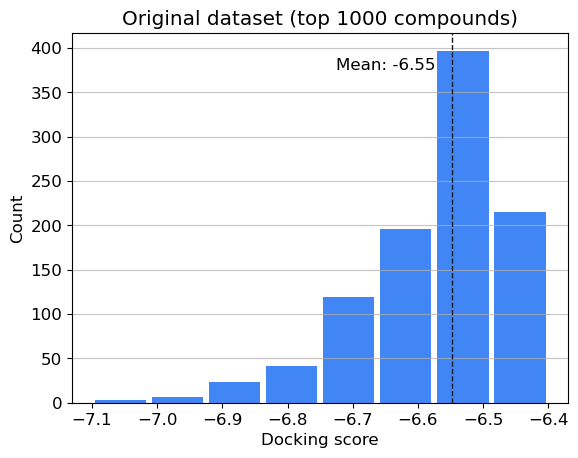

In [235]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'font.size':12})
plt.clf()
plot_histogram(original_dataset_top_1000['r_i_docking_score'], 'Original dataset (top 1000 compounds)',1.027)
plt.savefig('extraction_outputs/original_dataset_top_1000.pdf',bbox_inches = "tight")

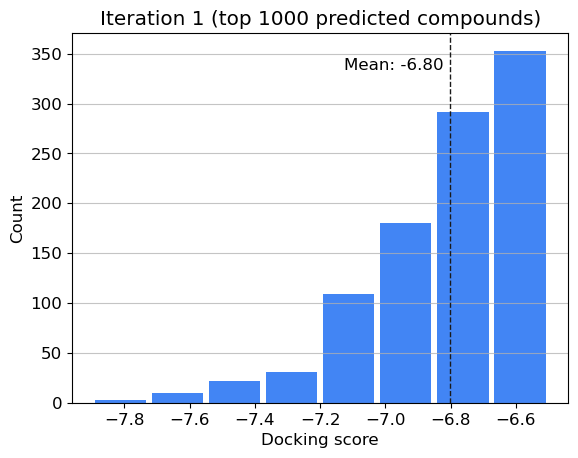

In [236]:
plot_histogram(iteration_1_top_1000['r_i_docking_score'], 'Iteration 1 (top 1000 predicted compounds)', 1.048)
plt.savefig('extraction_outputs/iteration_1_top_1000.pdf',bbox_inches = "tight")

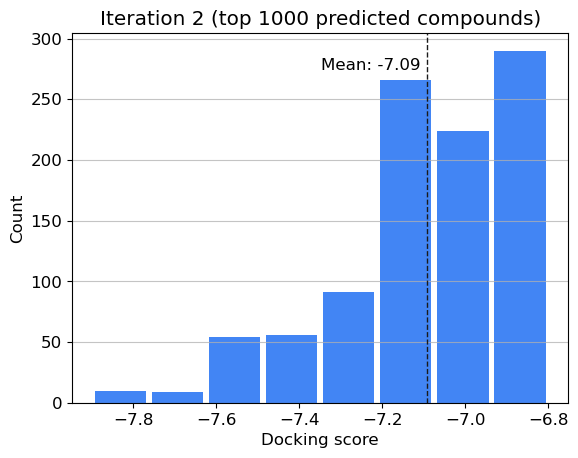

In [237]:
plot_histogram(iteration_2_top_1000['r_i_docking_score'], 'Iteration 2 (top 1000 predicted compounds)', 1.036)
plt.savefig('extraction_outputs/iteration_2_top_1000.pdf',bbox_inches = "tight")

## PHYSIOCHEMICAL PROPERTIES TEST

In [118]:
# Function to check if the molecule passes certain physiochemical properties
def passes_physiochemical(smile, max_logP = 3, max_molWt = 360 , 
                          min_TPSA = 40, max_TPSA = 90, max_HBD= 0.5):
    m = Chem.MolFromSmiles(smile)
    logP = Descriptors.MolLogP(m)
    molWt = Descriptors.MolWt(m)
    TPSA = Descriptors.TPSA(m)
    HBD = Chem.rdMolDescriptors.CalcNumHBD(m)
    if(logP <= max_logP and molWt <= max_molWt and TPSA >= min_TPSA and TPSA <= max_TPSA and HBD <= max_HBD):
        return True 
    return False 

def add_properties_to_dataframe(df):
    df['logP'] = df.apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x['smile'])),axis=1)
    df['molWt'] = df.apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x['smile'])),axis=1)
    df['TPSA'] = df.apply(lambda x: Descriptors.TPSA(Chem.MolFromSmiles(x['smile'])),axis=1)
    df['HBD'] = df.apply(lambda x: Chem.rdMolDescriptors.CalcNumHBD(Chem.MolFromSmiles(x['smile'])),axis=1)
    return(df)

In [119]:
iteration_1['passes'] = iteration_1.apply(lambda x: passes_physiochemical(x['smile']),axis=1)
iteration_2['passes'] = iteration_2.apply(lambda x: passes_physiochemical(x['smile']),axis=1)

In [120]:
iteration_1_promising  = iteration_1[iteration_1['passes']==True]
iteration_1_promising =  iteration_1_promising[iteration_1_promising['r_i_docking_score']<-6.5]
iteration_2_promising  = iteration_2[iteration_2['passes']==True]
iteration_2_promising =  iteration_2_promising[iteration_2_promising['r_i_docking_score']<-6.5]

In [121]:
iteration_1_promising = add_properties_to_dataframe(iteration_1_promising)

In [122]:
iteration_2_promising = add_properties_to_dataframe(iteration_2_promising)

In [123]:
all_promising = pd.concat([iteration_1_promising,iteration_2_promising])

In [124]:
all_promising.round(2).to_csv('extraction_outputs/all_promising.csv')

# CLUSTERING

## Load labels for a random sample of library or load random sample

In [49]:
# labels_random_testing = pd.read_csv('../DD_updated_morgan/DD_main/results/abeta/iteration_1/testing_labels.txt')
# labels_random_training = pd.read_csv('../DD_updated_morgan/DD_main/results/abeta/iteration_1/training_labels.txt')
# labels_random_validation = pd.read_csv('../DD_updated_morgan/DD_main/results/abeta/iteration_1/validation_labels.txt')

# smiles_random_testing = pd.read_csv('../DD_updated_morgan/DD_main/results/abeta/iteration_1/smile/test_smiles_final_updated.smi', header=None,sep=' ', names=['smile', 'ZINC_ID'])
# smiles_random_training = pd.read_csv('../DD_updated_morgan/DD_main/results/abeta/iteration_1/smile/train_smiles_final_updated.smi', header=None,sep=' ', names=['smile', 'ZINC_ID'])
# smiles_random_validation = pd.read_csv('../DD_updated_morgan/DD_main/results/abeta/iteration_1/smile/valid_smiles_final_updated.smi', header=None,sep=' ', names=['smile', 'ZINC_ID'])


In [50]:
# labels_random = pd.concat([labels_random_testing,labels_random_training,labels_random_validation])
# smiles_random = pd.concat([smiles_random_testing, smiles_random_training, smiles_random_validation])
# random_sample_full = pd.merge(labels_random, smiles_random, on='ZINC_ID', how='left')

In [51]:
# random_sample = random_sample_full.sample(3652)
# random_sample.to_csv('random_sample.csv', index=False)

In [139]:
random_sample = pd.read_csv('random_sample.csv')
random_sample

,r_i_docking_score,ZINC_ID,smile
0,-5.3,ZINC001013472704,Cc1c(C(=O)N2C[C@@H]3C(NC(=O)c4cnco4)[C@H]3C2)n...
1,-5.0,ZINC001243087935,Cc1ccc(OC(C)C)c(-c2ccc(F)nc2C)c1
2,-6.2,ZINC001174985979,Cc1ccc(C(=O)O)cc1-n1nc(-c2ccncc2)c2cc(N)ccc21
3,-4.3,ZINC001030953705,O=C(NC1CN(CCO)C1)c1cc[nH]c1C1CCC1
4,-5.4,ZINC001015323247,Cn1cc(C(=O)NC[C@@H]2CC[C@@H](NC(=O)c3cnn(C)c3)...
...,...,...,...
3647,-5.3,ZINC000190093030,CCOc1ccc(NC(=O)c2cnn(C(C)C)c2)c(C)c1
3648,-4.8,ZINC000838712739,C=CCONC(=O)N1CCC[C@@H]2CN(C)CC[C@@H]21
3649,-6.0,ZINC000582480681,O=C(COC1CCNCC1)Nc1cccc(C(=O)c2ccccc2)c1
3650,-6.1,ZINC001174204790,CC1CCN(C(=O)c2cccc(Nc3cccnc3C3CC3)c2)CC1


## Prepare data

In [141]:
full_sample = pd.concat([all_predicted_hits,random_sample])

# Get molecules
full_sample_compounds = []
for _, zinc_id, smiles, score in full_sample[["ZINC_ID", "smile", 'r_i_docking_score']].itertuples():
    full_sample_compounds.append((Chem.MolFromSmiles(smiles), zinc_id,score))
full_sample_compounds[:5]

# Get RDKit fingerprints
rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
full_sample_fingerprints = [rdkit_gen.GetFingerprint(mol) for mol, idx,score in full_sample_compounds]

full_sample_morgan_fingerprints_og_structure = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol, idx,score in full_sample_compounds]

# Get Morgan fingerprints as vectors
full_sample_morgan_fingerprints= []
for mol, idx,score in full_sample_compounds:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    array = np.zeros((0, ), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, array)
    full_sample_morgan_fingerprints.append(array)


## Butina clustering

### Steps here are adapted from https://projects.volkamerlab.org/teachopencadd/talktorials/T005_compound_clustering.html

In [60]:
def tanimoto_distance_matrix(fp_list):
    """Calculate distance matrix for fingerprint list"""
    dissimilarity_matrix = []
    # Notice how we are deliberately skipping the first and last items in the list
    # because we don't need to compare them against themselves
    for i in range(1, len(fp_list)):
        # Compare the current fingerprint against all the previous ones in the list
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        # Since we need a distance matrix, calculate 1-x for every element in similarity matrix
        dissimilarity_matrix.extend([1 - x for x in similarities])
    return dissimilarity_matrix

def cluster_fingerprints(fingerprints, cutoff=0.2):
    """Cluster fingerprints
    Parameters:
        fingerprints
        cutoff: threshold for the clustering
    """
    # Calculate Tanimoto distance matrix
    distance_matrix = tanimoto_distance_matrix(fingerprints)
    # Now cluster the data with the implemented Butina algorithm:
    clusters = Butina.ClusterData(distance_matrix, len(fingerprints), cutoff, isDistData=True)
    clusters = sorted(clusters, key=len, reverse=True)
    return clusters

In [164]:
# Run the clustering procedure for the dataset
clusters = cluster_fingerprints(full_sample_fingerprints, cutoff=0.2)

# Give a short report about the numbers of clusters and their sizes
num_clust_g1 = sum(1 for c in clusters if len(c) == 1)
num_clust_g5 = sum(1 for c in clusters if len(c) > 5)
num_clust_g25 = sum(1 for c in clusters if len(c) > 25)
num_clust_g100 = sum(1 for c in clusters if len(c) > 100)

print("total # clusters: ", len(clusters))
print("# clusters with only 1 compound: ", num_clust_g1)
print("# clusters with >5 compounds: ", num_clust_g5)
print("# clusters with >25 compounds: ", num_clust_g25)
print("# clusters with >100 compounds: ", num_clust_g100)

total # clusters:  5443
# clusters with only 1 compound:  4722
# clusters with >5 compounds:  80
# clusters with >25 compounds:  6
# clusters with >100 compounds:  0


In [243]:
# CODE TO EXPLORE DIFFERENT CUTOFF OPTIONS:

# for cutoff in numpy.arange(0.0, 1.0, 0.2):
#     clusters = cluster_fingerprints(full_sample_fingerprints, cutoff=cutoff)
#     fig, ax = plt.subplots(figsize=(15, 4))
#     ax.set_title(f"Threshold: {cutoff:3.1f}")
#     ax.set_xlabel("Cluster index")
#     ax.set_ylabel("Number of molecules")
#     ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters], lw=5)
#     display(fig)

Number of clusters: 5443 from 7304 molecules at distance cut-off 0.20
Number of molecules in largest cluster: 49
Similarity between two random points in same cluster: 0.91
Similarity between two random points in different cluster: 0.47


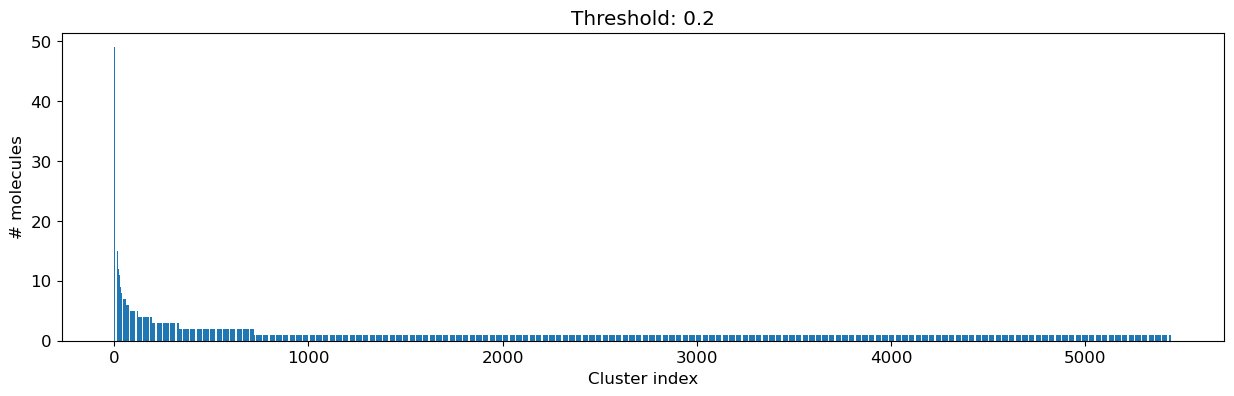

In [244]:
cutoff = 0.2
clusters = cluster_fingerprints(full_sample_fingerprints, cutoff=cutoff)

# Plot the size of the clusters - save plot
fig, ax = plt.subplots(figsize=(15, 4))
ax.set_xlabel("Cluster index")
ax.set_ylabel("# molecules")
ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters])
ax.set_title(f"Threshold: {cutoff:3.1f}")

print(
    f"Number of clusters: {len(clusters)} from {len(full_sample_compounds)} molecules at distance cut-off {cutoff:.2f}"
)
print("Number of molecules in largest cluster:", len(clusters[0]))
print(
    f"Similarity between two random points in same cluster: {DataStructs.TanimotoSimilarity(full_sample_fingerprints[clusters[0][0]], full_sample_fingerprints[clusters[0][1]]):.2f}"
)
print(
    f"Similarity between two random points in different cluster: {DataStructs.TanimotoSimilarity(full_sample_fingerprints[clusters[0][0]], full_sample_fingerprints[clusters[1][0]]):.2f}"
)

In [241]:
# Select clusters of at least 10 compounds and mean score below -6.8
selected_clusters = []
for cluster in clusters:
    if len(cluster)>10:
        scores = np.array([full_sample_compounds[i][2] for i in cluster])
        if scores.mean()<-6.8:
            print(scores.mean(),scores.std())
            selected_clusters.append(cluster)

-6.816326530612245 0.2720646222570691
-6.8769230769230765 0.18873606379054308
-6.842857142857143 0.20429070922964412
-6.8625 0.225115710987335
-6.829411764705883 0.09557692240748204
-6.864705882352941 0.23995385946318984
-6.887499999999999 0.40600954422279284
-6.986666666666666 0.14544949486180944
-6.807692307692308 0.37919253981126877
-7.107692307692307 0.37098940159346155
-7.0583333333333345 0.21778557242286636
-7.2 0.26770630673681683


In [240]:
# Draw centres from the selected clusters and save them
img = Draw.MolsToGridImage(
    [full_sample_compounds[selected_clusters[i][0]][0] for i in range(len(selected_clusters))],
    legends=[full_sample_compounds[selected_clusters[i][0]][1] for i in range(len(selected_clusters))],
    molsPerRow=5,
    subImgSize=(200, 200),
    useSVG=True,
)

# Making image looking better
molsvg = img.data.replace("opacity:1.0", "opacity:0.0").replace("12px", "20px")

# Save SVG image
with open("extraction_outputs/cluster_representatives.svg", "w") as f:
    f.write(molsvg)

Extract butina cluster labels and append them to the dataframe of full_sample

In [211]:
butina_clusters = [-1] * len(full_sample_compounds)
for index, cluster in enumerate(clusters):
    if len(cluster)>10:
        for compound in cluster:
            butina_clusters[compound] = index

In [212]:
full_sample['butina'] = butina_clusters

## Alternative clustering and 2D visualisation

### Steps here are adapted from https://github.com/iwatobipen/chemo_info/blob/master/chemicalspace2/HDBSCAN_Chemoinfo.ipynb

In [90]:
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha':0.5, 's':80, 'linewidth':0}

In [175]:
def tanimoto_dist(a,b):
    dotprod = np.dot(a,b)
    tc = dotprod / (np.sum(a) + np.sum(b) - dotprod)
    return 1.0-tc
 
tsne = TSNE(n_components=2, metric=tanimoto_dist)
tsne_X = tsne.fit_transform(full_sample_morgan_fingerprints)

/home/mb2462/.conda/envs/DD_protocol/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/mb2462/.conda/envs/DD_protocol/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/mb2462/.conda/envs/DD_protocol/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


In [176]:
cluster_tsne = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
cluster_tsne.fit(tsne_X)

HDBSCAN(gen_min_span_tree=True)

In [179]:
full_sample['tsne'] = cluster_tsne.labels_

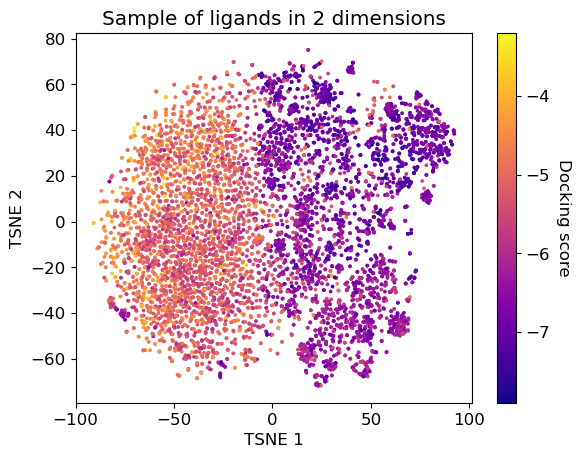

In [233]:
scatter = plt.scatter(tsne_X.T[0], tsne_X.T[1], c = full_sample['r_i_docking_score'], cmap='plasma',s=3)
cbar = plt.colorbar(scatter)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Docking score', rotation=270)
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.title("Sample of ligands in 2 dimensions")
plt.savefig('extraction_outputs/2d_projection_with_score.pdf',bbox_inches = "tight")

Add cluster labels to promising compounds

In [230]:
all_promising_with_clusters = pd.merge(all_promising, full_sample, on="ZINC_ID", how="left")

In [245]:
clean_all_promising_with_clusters = all_promising_with_clusters[["ZINC_ID","r_i_docking_score_x", "logP", "molWt","TPSA","HBD","butina", "tsne"]]
clean_all_promising_with_clusters = clean_all_promising_with_clusters.rename(columns={'r_i_docking_score_x': 'score', 'butina': 'Butina','tsne':'HBDSCAN'})

In [232]:
clean_all_promising.round(2).to_csv('extraction_outputs/all_promising_with_clusters.csv')